В качестве ответа вставьте в форму ниже ссылку на ноутбук или сам файл в формате IPYNB. Ментор проверит ваше решение и даст свою оценку и комментарии.

→ В файле должно содержаться 10 графиков — 10 ответов к заданиям.

→ Каждый график и преобразования к нему выполняются в отдельной ячейке.

→ Под графиком вы должны предоставить свой ответ на вопрос по нему и, если это требуется, выводы, которые вы можете сделать, исходя из графика.


Столбцы таблицы:

    RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
    CustomerId — идентификатор клиента
    Surname — фамилия клиента
    CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
    Geography — страна клиента (банк международный)
    Gender — пол клиента
    Age — возраст клиента

    Tenure — сколько лет клиент пользуется услугами банка
    Balance — баланс на счетах клиента в банке
    NumOfProducts — количество услуг банка, которые приобрёл клиент
    HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
    IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
    EstimatedSalary — предполагаемая заработная плата клиента
    Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)



In [35]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(columns=['RowNumber'])
#churn_data.head()


 9.1. Каково соотношение ушедших и лояльных клиентов?  
 Покажите это на графике и дайте комментарий по соотношению.

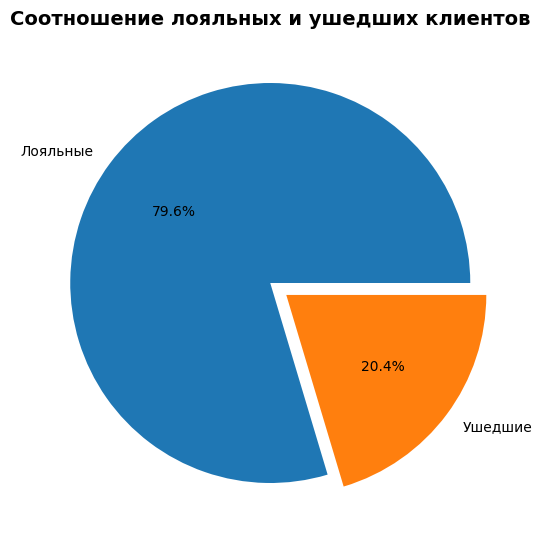

In [36]:
#код для задания 9.1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(columns=['RowNumber'])


loyal = (churn_data['Exited']==0).sum() #считаем количество лояльных и ушедших клиентов.
exited = (churn_data['Exited']==1).sum()

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    [loyal,exited],
    labels=['Лояльные','Ушедшие'],
    autopct='%.1f%%',
    explode = [0, 0.1] 
);
plt.title("Соотношение лояльных и ушедших клиентов", fontsize=14, fontweight='bold')
plt.show()

Выводы 9.1:  
Соотношение лояльных и ушедших клиентов, представленных в базе, составляет 4:1.  
В настоящий момент порядка 80% клиентов остаются лояльными банку.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.  
Опишите распределение и сделайте выводы.

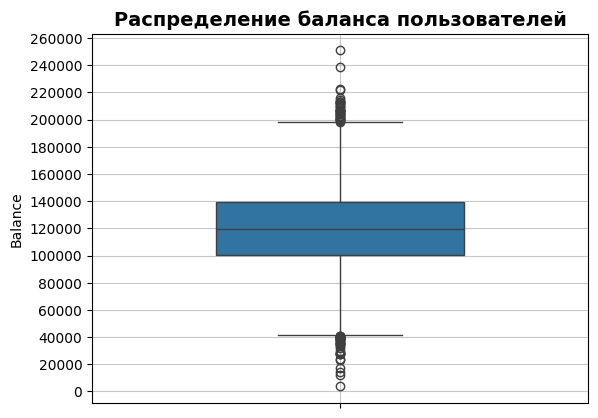

In [5]:
#код для задания 9.2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(columns=['RowNumber'])

churn_data_filt = churn_data[churn_data['Balance']> 2500]

boxplot = sns.boxplot(
    data=churn_data_filt,
    y= 'Balance',
    width=0.5,
      
);

plt.title('Распределение баланса пользователей', fontsize=14, fontweight='bold')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(20000)) # Настраиваем шаг меток на оси Y
plt.grid(True, linestyle='-', alpha=0.7) # Добавляем сетку


Выводы 9.2:  
Медиана находится на уровне 120к ближе к середине коробки (общий разброс 100к – 140к ) - распределение относительно симметричное, без явного перекоса.  
50% наблюдений сконцентрированы в диапазоне 100к - 140к.  
Полный диапазон составляет 40к - 200к, крайние значения распределены симметрично относительно медианы.  



9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока.  
Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?  
Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

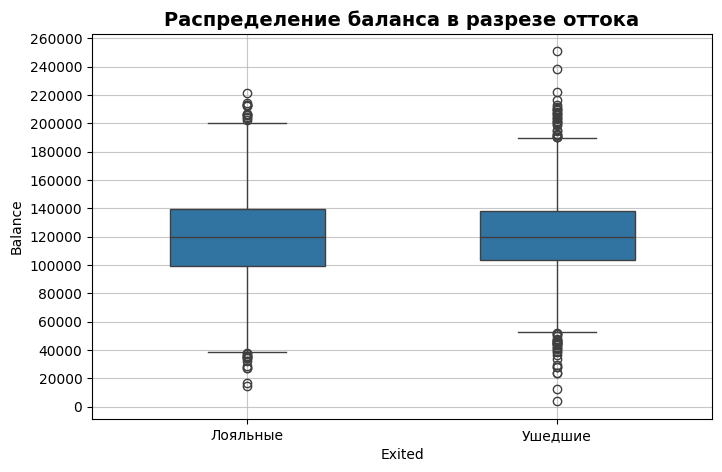

In [6]:
#код для задания 9.3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(columns=['RowNumber'])

churn_data_filt = churn_data[churn_data['Balance']> 2500]
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=churn_data_filt, 
    x='Exited', 
    y='Balance', 
    width=0.5
)
plt.xticks([0, 1], ['Лояльные', 'Ушедшие'])
plt.title('Распределение баланса в разрезе оттока', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='-', alpha=0.7)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(20000)) # Настраиваем шаг меток на оси Y


Выводы 9.3:  

Медиана баланса у всех клиентов примерно одинакова  - 120к.  
Это говорит о том, что средний клиент с высокой вероятностью остается лояльным.  
Разброс баланса примерно схож, но у ушедших клиентов больше выбросов в сторону крупных сумм.  
Это может означать, что часть клиентов с высокими балансами предпочитает уходить.  
Возможно у банка нет услуг и привилегий для клиентов с высокими балансами, или же у конкурентов  есть более привлекательные предложения для этого сегмента клиентов.

9.4. Посмотрите на распределение возраста в разрезе признака оттока.  
В какой группе больше потенциальных выбросов?  
На какую возрастную категорию клиентов стоит обратить внимание банку?

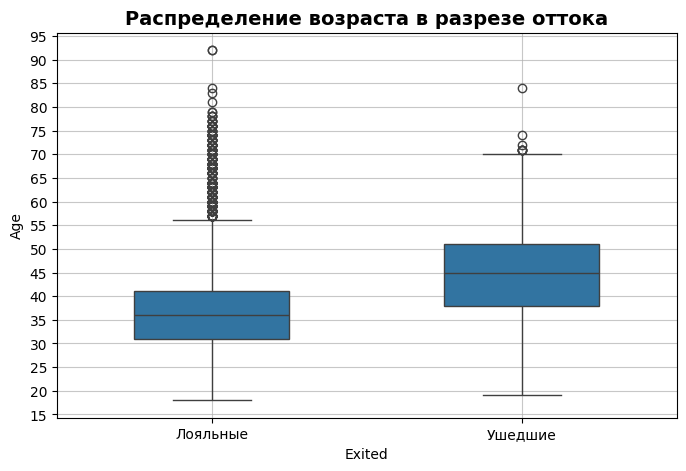

In [7]:
#код для задания 9.4
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(columns=['RowNumber'])

plt.figure(figsize=(8, 5))

sns.boxplot(
    data=churn_data_filt, 
    x='Exited', 
    y='Age',
    width=0.5
)
plt.xticks([0, 1], ['Лояльные', 'Ушедшие'])
plt.title('Распределение возраста в разрезе оттока', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='-', alpha=0.7)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))

Выводы 9.4:  
Медианное значение возраста лояльных клиентов находится на уровне примерно 36 лет.  
Для ушедших клиентов медиана возраста порядка 45 лет.  
Среди лояльных клиентов наблюдается много выбросов начиная с 56 лет.  
Банку следует обратить внимание на возрастную группу в диапазоне примерно 38-51 год.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.  
Добавьте расцветку по признаку оттока клиентов.  
Какова взаимосвязь между признаками?  
Если не видите явной взаимосвязи, укажите это.

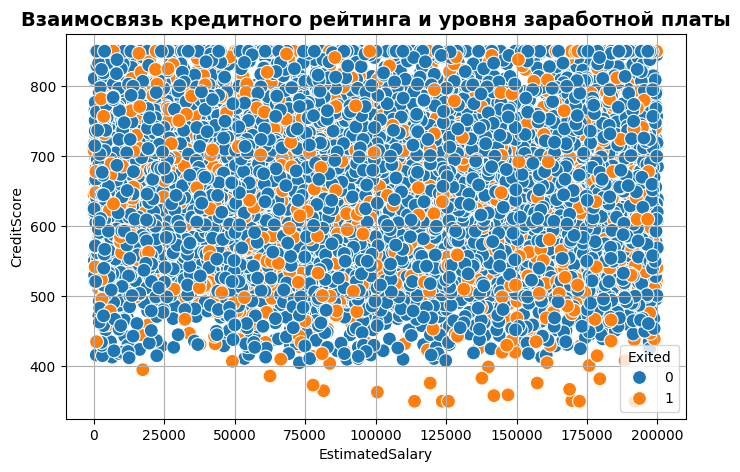

In [8]:
#код для задания 9.5
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(columns=['RowNumber'])

fig = plt.figure(figsize=(8, 5))
scatterplot = sns.scatterplot(
    data = churn_data,
    x='EstimatedSalary', 
    y='CreditScore', 
    s=100,
    marker='o',
    hue='Exited' #группируем данные по признаку лояльности.
);
scatterplot.set_title('Взаимосвязь кредитного рейтинга и уровня заработной платы', fontsize=14, fontweight='bold')

plt.grid(True)
plt.show()


Выводы 9.5:  
Из полученного графика нельзя сделать однозначных выводов о взаимосвязи кредитного рейтинга и уровня заработной платы.  
Клиенты с различным рейтингом, уровнем заработной платы и лояльностью довольно равномерно распределены по плоскости (в диапазоне рейтинга 500-800).

9.6 Кто чаще уходит, мужчины или женщины?  
Постройте график, который иллюстрирует это.

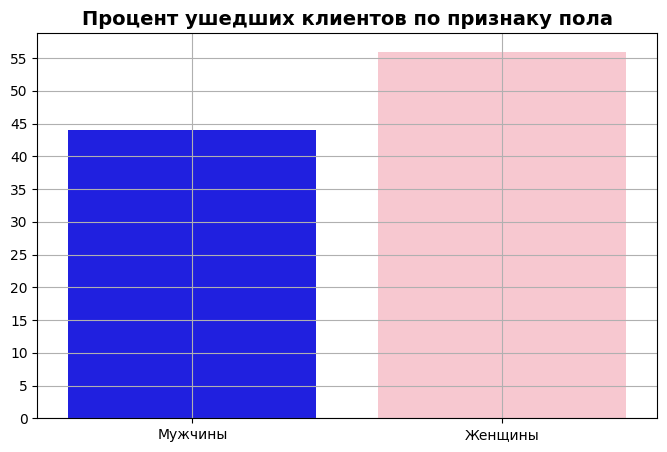

In [9]:
#код для задания 9.6
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(columns=['RowNumber'])

churn_data_ex = churn_data[churn_data['Exited']==1]


male_ex = round((churn_data_ex[churn_data_ex['Gender']=='Male']['Exited'].sum() / churn_data_ex['Exited'].count())*100,0)
female_ex = round(churn_data_ex[churn_data_ex['Gender']=='Female']['Exited'].sum() / churn_data_ex['Exited'].count()*100,0)

gender_labels = ['Мужчины', 'Женщины']
exit_percent = [male_ex, female_ex]

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_labels, y=exit_percent, palette=['blue', 'pink'])

plt.title('Процент ушедших клиентов по признаку пола', fontsize=14, fontweight='bold')
plt.grid(True)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))

#plt.show()

Выводы 9.6:  
Среди ушедших клиентов доля женщин составляет 56%, доля мужчин - 44%  
Т.о. женщины уходят чаще мужчин примерно на 27%.


9.7. Как отток клиентов зависит от числа приобретённых у банка услуг?  
Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

,NumOfProducts,Exited,Count
0,1,0,3675
1,1,1,1409
2,2,0,4242
3,2,1,348
4,3,0,46
5,3,1,220
6,4,1,60


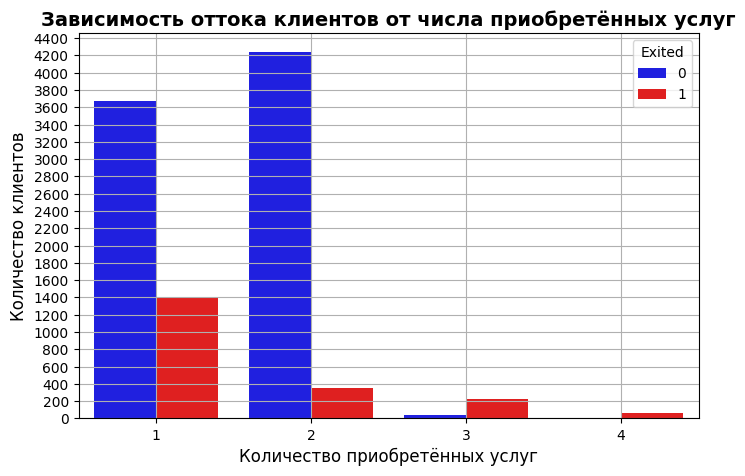

In [10]:
#код для задания 9.7
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(columns=['RowNumber'])

churn_data_grouped = churn_data.groupby(['NumOfProducts', 'Exited']).size().reset_index(name='Count')
display(churn_data_grouped)


plt.figure(figsize=(8, 5))
sns.barplot(x='NumOfProducts', y='Count', hue='Exited', data=churn_data_grouped, palette=['blue', 'red'])


plt.xlabel('Количество приобретённых услуг', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.title('Зависимость оттока клиентов от числа приобретённых услуг', fontsize=14, fontweight='bold')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(200))
plt.grid(True)

plt.show()

Выводы 9.7:  
Наименьшее количество ушедших клиентов наблюдается в группе, купившей 2 услуги.  
Для клиентов, приобретших 1 продукт отношение ушедших к лояльным составляет порядка 40%. (и 28% от общего числа клиентов в этой группе).  
Среди клиентов, купивших три продукта лояльными остается лишь небольшая доля - порядка 17% от общего числа клиентов в этой группе.

9.8. Как влияет наличие статуса активного клиента на отток клиентов?  
Постройте диаграмму, иллюстрирующую это.  
Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

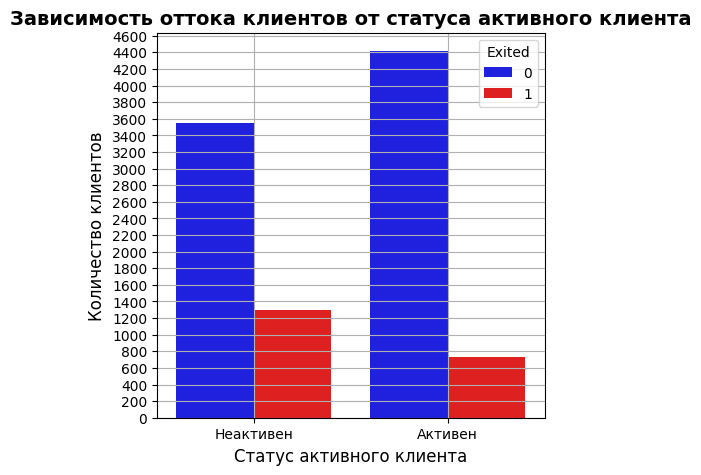

In [11]:
#код для задания 9.8
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(columns=['RowNumber'])

churn_data_grouped = churn_data.groupby(['IsActiveMember', 'Exited']).size().reset_index(name='Count')
#display(churn_data_grouped)


plt.figure(figsize=(5, 5))
sns.barplot(x='IsActiveMember', y='Count', hue='Exited', data=churn_data_grouped, palette=['blue', 'red'])

plt.xticks(ticks=[0, 1], labels=['Неактивен', 'Активен'])
plt.xlabel('Cтатус активного клиента', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.title('Зависимость оттока клиентов от статуса активного клиента', fontsize=14, fontweight='bold')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(200))
plt.grid(True)

plt.show()


Выводы 9.8:  
Отток клиентов в статусе "неактивен" превышает отток среди активных клиентов почти в два раза (примерно 1300 против 700).  
Возможно это связано с тем, что для активных клиентов банк предоставляет более выгодные условия и/или интересные предложения.  
Вероятно банку следует распространить свои программы лояльности на клиентов в статусе "неактивен" для их удержания. 



9.9. В какой стране доля ушедших клиентов больше?  
Постройте тепловую картограмму, которая покажет это соотношение на карте мира.  
Предположите, с чем это может быть связано.

In [29]:
#код для задания 9.9
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(columns=['RowNumber'])

churn_data_countries = churn_data.groupby(['Geography'])['Exited'].agg(lambda x: round(x.sum()/x.count()*100,2)).reset_index(name='ExitPart')
#display(churn_data_countries)

fig = px.choropleth(
    data_frame=churn_data_countries, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="ExitPart", #от чего зависит цвет
    range_color=[0, 40], #диапазон цвета
    title='Доля ушедших клиентов по странам (Европа)', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)
fig.update_geos(
    scope="europe"
)
fig.show()

Выводы 9.9:  
Доля ушедших клиентов в Германии в два раза выше чем в Франции и Испании.  
Это может быть связано с уровнем конкуренции между банками в странах - чем сильнее конкуренция, тем больше выгодных предложений для клиентов может присутствовать на рынке банковских услуг.



9.10.  Переведите числовой признак CreditScore в категориальный.  
Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.  
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat),  
а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure).  
В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией.  
Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

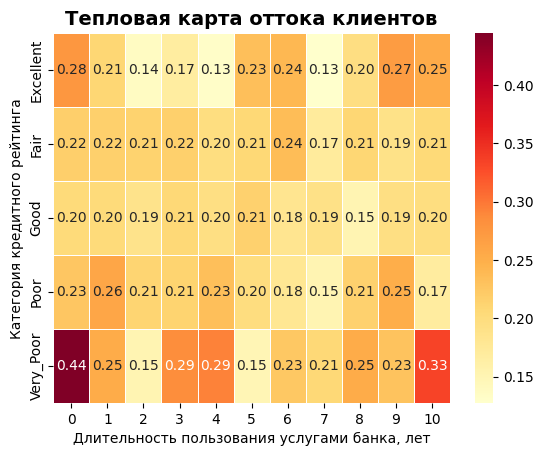

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

#функция для формирования кредитного рейтинга
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data = pd.read_csv('data/churn.csv')
churn_data_upd = churn_data.copy()
churn_data_upd = churn_data_upd.drop(columns=['RowNumber'])
churn_data_upd['CreditScoreCat'] = churn_data_upd['CreditScore'].apply(get_credit_score_cat)
#display(churn_data_upd)

pivot = churn_data_upd.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
    fill_value='None'
)
#display(pivot)

heatmap = sns.heatmap(data=pivot, cmap='YlOrRd', annot=True, fmt=".2f", linewidths=0.5)
heatmap.set_title('Тепловая карта оттока клиентов', fontsize=14, fontweight='bold');
plt.xlabel("Длительность пользования услугами банка, лет")
plt.ylabel("Категория кредитного рейтинга")
plt.show()


Выводы 9.10:  
Наиболее часто уходят клиенты с кредитным рейтингом Very Poor и периодом пользования услугами банка до 1 года или 10 и более лет.  
Наиболее стабильны в течение всего срока пользования услугами клиенты с рейтингами Good и Fair.
